# Airbnb Analysis And Price Prediction

## Problem Defining


Airbnb is a game-changer in traditional hospitality businesses, providing guests with a more distinctive and personalized option of traveling and experiencing the world. We'd want to explore the pricing listings in the New York City and develop a price prediction for travelers to use when deciding where to stay. In addition, we'd want to dig into the common features of popular listings and make some recommendations to (prospective)/ hosts on how to make their listings popular.



**Data Source**：
> listings: http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/data/listings.csv.gz </br>
> reviews: http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/data/reviews.csv.gz

### Libraries And Utilities

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 350)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zicon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Importation And Assessment

In [3]:
# Import data
listing_data = pd.read_csv('listings.csv')
listing_data.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,80%,17%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,8.0,8.0,"['email', 'phone', 'reviews', 'offline_governm...",t,...,t,3,33,63,338,2021-12-05,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,a few days or more,9%,69%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,...,t,3,6,18,194,2021-12-05,409,32,0,2015-01-05,2021-10-22,4.45,4.58,4.49,4.78,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,...,t,30,60,90,365,2021-12-05,50,0,0,2014-01-22,2016-06-05,4.52,4.22,4.09,4.91,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52


<AxesSubplot:>

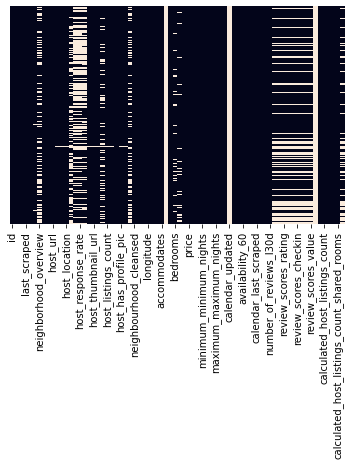

In [4]:
sns.heatmap(listing_data.isnull(),yticklabels=False,cbar=False)

### Apply first level of data clean for EDA

In [5]:
# Remove observation without feature price
listing_data.dropna(subset=['price'],inplace=True)
# Convert feature price into integer
listing_data['price'] = listing_data['price'].str.replace(',', '').str.replace('$', '').astype(float)

## Exploratory Data Analysis

### Numeric Features Distribution Analysis

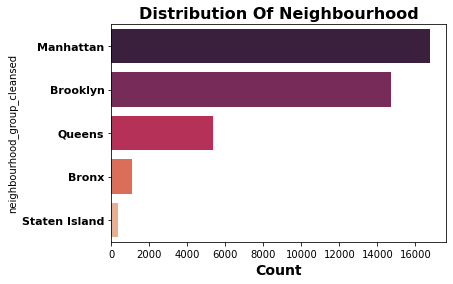

In [6]:
# Distribution of Neighbourhood
neighbourhood = sns.countplot(y=listing_data['neighbourhood_group_cleansed'],
                   order=listing_data['neighbourhood_group_cleansed'].value_counts().index,palette='rocket')
neighbourhood.set_yticklabels(neighbourhood.get_yticklabels(),fontsize=11,fontweight='bold')
neighbourhood.set_title('Distribution Of Neighbourhood',fontsize=16,fontweight='bold')
neighbourhood.set_xlabel('Count',fontsize=14,fontweight='bold')
plt.show()

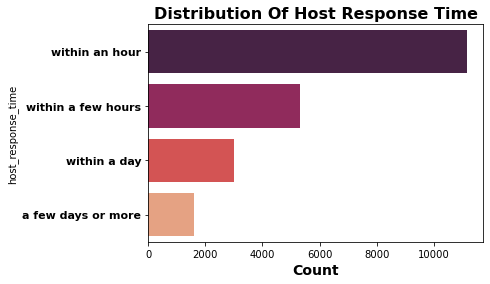

In [7]:
# Distribution Of Host Response Time
host_response_time = sns.countplot(y=listing_data['host_response_time'],
                   order=listing_data['host_response_time'].value_counts().index,palette='rocket')
host_response_time.set_yticklabels(host_response_time.get_yticklabels(),fontsize=11,fontweight='bold')
host_response_time.set_title('Distribution Of Host Response Time',fontsize=16,fontweight='bold')
host_response_time.set_xlabel('Count',fontsize=14,fontweight='bold')
plt.show()

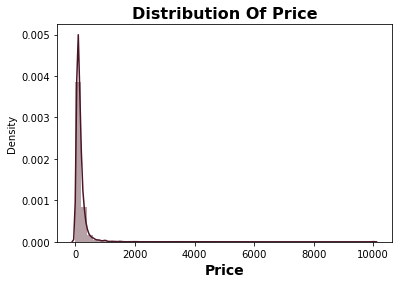

In [8]:
# Distribution Of Price
price = sns.distplot(listing_data['price'], color ='#4a1525')
price.set_title('Distribution Of Price',fontsize=16,fontweight='bold')
price.set_xlabel('Price',fontsize=14,fontweight='bold')
plt.show()

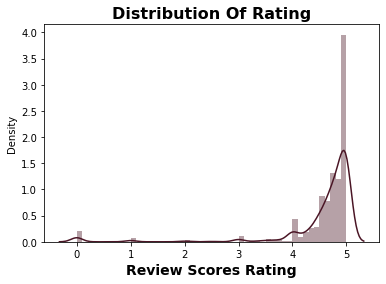

In [9]:
# Distribution Of Review Scores Rating
price = sns.distplot(listing_data['review_scores_rating'], color ='#4a1525')
price.set_title('Distribution Of Rating',fontsize=16,fontweight='bold')
price.set_xlabel('Review Scores Rating',fontsize=14,fontweight='bold')
plt.show()

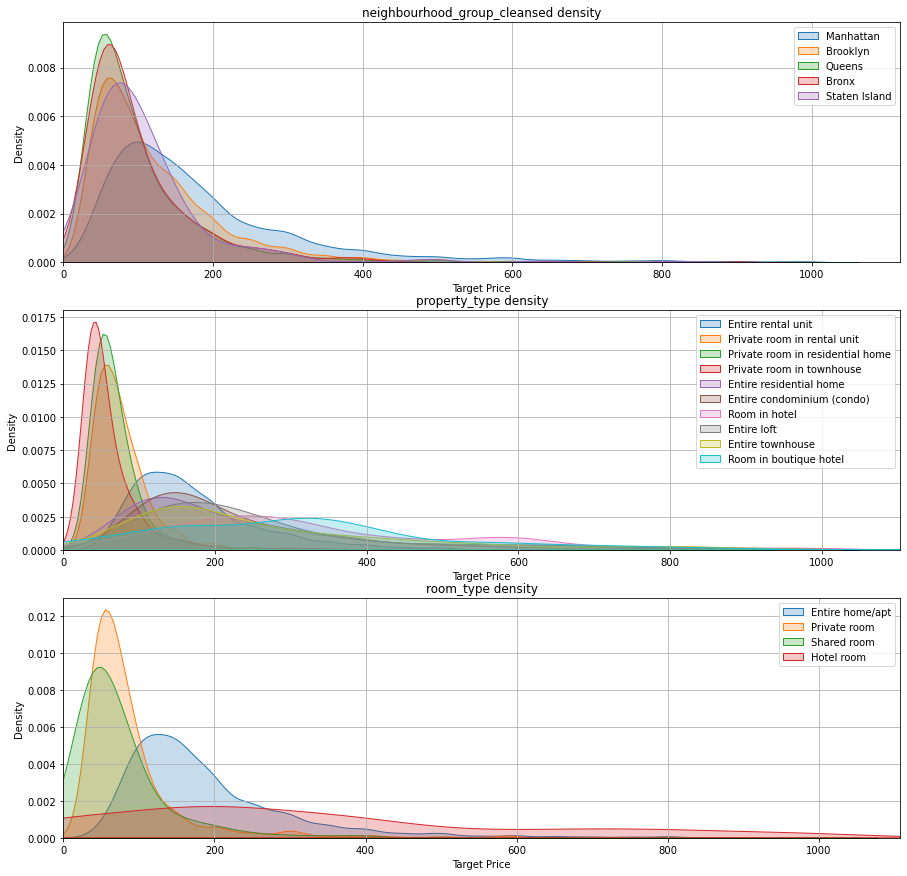

In [10]:
listing_data = listing_data[(listing_data['price']<1000)]

names = list(['neighbourhood_group_cleansed','property_type','room_type'])
fig, axs = plt.subplots(3, 1,figsize=(15,15))

for col in names: 
    ax = axs[names.index(col)]
    count = listing_data[col].value_counts()[:10]
    countdf = pd.DataFrame({'label': list(count.keys()),
                   'count': list(count[:])})
    
    for cat in countdf['label']:
        # subset by category(label)
        subset = listing_data[listing_data[col] == cat]
        # Draw the density plot
        sns.distplot(subset['price'], hist = False, kde = True,label = cat,
                     kde_kws = {'shade': True,'linewidth': 1},ax=ax).set(xlim=(0))
               
        ax.set_xlabel('Target Price')
        ax.set_title(col + ' density')
        ax.grid('on')
        ax.legend()
        #fig.legend(labels=['test_label1','test_label2'])
        #ax.legend(label,countdf['label'], title=column_name)

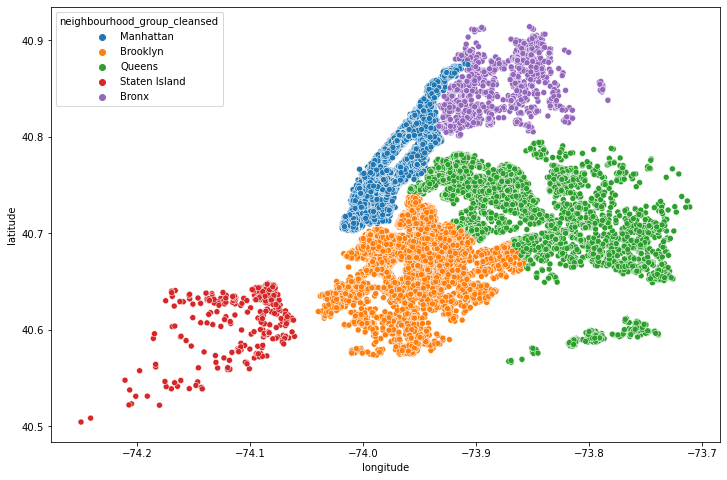

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(listing_data.longitude,listing_data.latitude,hue=listing_data.neighbourhood_group_cleansed)
plt.ioff()

### Text Based Analysis

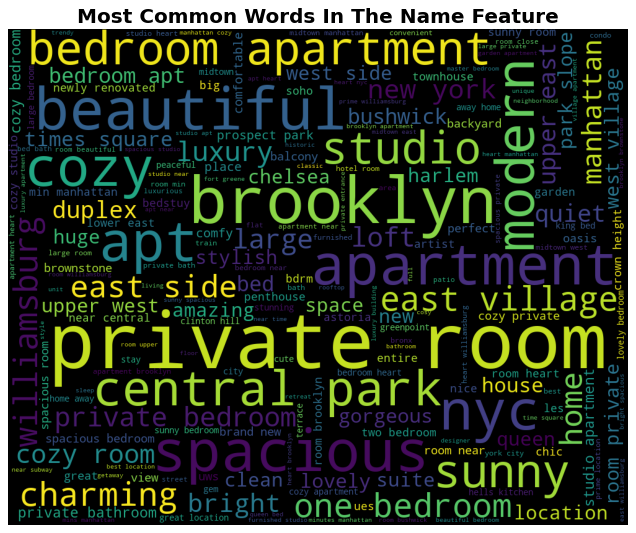

In [12]:
# to lower case
listing_data['name'] = listing_data['name'].str.lower()

# regular expression
regex = re.compile('[^a-z\s]')
# cast everything in column name as string object
listing_data['name'] = listing_data['name'].apply(lambda x: regex.sub('', str(x)))
names = ' '.join(listing_data['name'].values)
names = re.sub("^\d+\s|\s\d+\s|\s\d+$", "", names)
names = re.findall(r'\w+', names)
names = ' '.join([word for word in names if word not in stop_words and len(word) >2])

# Count frequency to show most common words
names_freq_dic = nltk.FreqDist(names.split(' '))
dict(names_freq_dic)


figure(figsize=(10, 10), dpi=80)

plt.imshow(WordCloud(width=1000,height=800,min_font_size=10,stopwords=stop_words).generate(names))
plt.title('Most Common Words In The Name Feature',fontsize=18,fontweight='bold')
plt.axis('off')
plt.show()

### Apply second level of data clean for Regression

In [13]:
# filter out unhelpful columns for regression
listing = listing_data.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about',
        'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications','neighbourhood',
       'neighbourhood_cleansed', 'bathrooms', 'amenities', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review',
        'license','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','host_since',
       'host_response_time', 'host_response_rate','host_acceptance_rate'], axis = 1)                 
listing.head(3)

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,f,8.0,8.0,t,t,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1 bath,NaN,1.0,150.0,30,t,3,33,63,338,48,0,0,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,0.33
1,f,1.0,1.0,t,t,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,75.0,1,t,3,6,18,194,409,32,0,4.45,4.58,4.49,4.78,4.80,4.71,4.64,f,4.86
2,f,1.0,1.0,t,t,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,1.0,1.0,60.0,30,t,30,60,90,365,50,0,0,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,0.52


In [14]:
listing.isnull().sum()

host_is_superhost                 34
host_listings_count               34
host_total_listings_count         34
host_has_profile_pic              34
host_identity_verified            34
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                   106
bedrooms                        3948
beds                            2371
price                              0
minimum_nights                     0
has_availability                   0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
review_scores_rating            9306
review_scores_accuracy          9915
review_scores_cleanliness       9904
r

In [15]:
#dataset cleaning

# Remove observation without any information about the host
listing.dropna(subset=['host_is_superhost'],inplace=True)
# Remove observation without any information about the bathrooms
listing.dropna(subset=['bathrooms_text'],inplace=True)

# Extract desire digits from string
listing['bathrooms_text'] = listing['bathrooms_text'].replace('Shared half-bath','0.5 bath')
listing['bathrooms_text'] = listing['bathrooms_text'].replace('Private half-bath','0.5 bath')
listing['bathrooms_text'] = listing['bathrooms_text'].replace('Half-bath','0.5 bath')
listing['bathrooms'] = listing['bathrooms_text'].str.split().str[0].astype(float)
listing.drop('bathrooms_text',axis=1,inplace=True)

# Convert (t,f) into (1,0)
listing['host_is_superhost'] = listing['host_is_superhost'].replace('t',1)
listing['host_is_superhost'] = listing['host_is_superhost'].replace('f',0)
listing['host_has_profile_pic'] = listing['host_has_profile_pic'].replace('t',1)
listing['host_has_profile_pic'] = listing['host_has_profile_pic'].replace('f',0)
listing['host_identity_verified'] = listing['host_identity_verified'].replace('t',1)
listing['host_identity_verified'] = listing['host_identity_verified'].replace('f',0)
listing['has_availability'] = listing['has_availability'].replace('t',1)
listing['has_availability'] = listing['has_availability'].replace('f',0)
listing['instant_bookable'] = listing['instant_bookable'].replace('t',1)
listing['instant_bookable'] = listing['instant_bookable'].replace('f',0)

# For beds and bedrooms missing values,
# assumeing 1 bedroom has 1 bed, and no.bedroom = no.bed
# drop both are null
listing = listing.drop(listing[(listing['bedrooms'].isnull()) & (listing['beds'].isnull())].index)
# fill each other with the corresponding value
listing['bedrooms'][listing['bedrooms'].isnull()] = listing['beds'][listing['bedrooms'][listing['bedrooms'].isnull()].index]
listing['beds'][listing['beds'].isnull()] = listing['bedrooms'][listing['beds'][listing['beds'].isnull()].index]

# reviews_per_month is a calculated field, null means 0
listing['reviews_per_month'][listing['reviews_per_month'].isnull()] = 0

# Process categorical variables with get_dummy
listing = pd.concat([listing, pd.get_dummies(listing[['neighbourhood_group_cleansed','property_type','room_type']])],axis=1)
listing.drop(['neighbourhood_group_cleansed','property_type','room_type'],axis=1,inplace=True)

# Fill the rest of reviews with column average
imp = SimpleImputer(strategy='mean')
temp_listing = imp.fit_transform(listing) 
cleanlistings = pd.DataFrame(temp_listing, columns = listing.columns)

In [16]:
#cleanlistings.to_csv('cleanlistings.csv', index=True)
cleanlistings

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,...,property_type_Room in aparthotel,property_type_Room in bed and breakfast,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Room in resort,property_type_Room in serviced apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in bungalow,property_type_Shared room in casa particular,property_type_Shared room in condominium (condo),property_type_Shared room in floor,property_type_Shared room in guest suite,property_type_Shared room in guesthouse,property_type_Shared room in hostel,property_type_Shared room in loft,property_type_Shared room in rental unit,property_type_Shared room in residential home,property_type_Shared room in serviced apartment,property_type_Shared room in townhouse,property_type_Tent,property_type_Tiny house,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,8.0,8.0,1.0,1.0,40.753560,-73.985590,1.0,1.0,1.0,150.0,30.0,1.0,3.0,33.0,63.0,338.0,48.0,0.0,0.0,4.700000,4.720000,4.620000,4.760000,4.790000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,40.684940,-73.957650,3.0,1.0,3.0,75.0,1.0,1.0,3.0,6.0,18.0,194.0,409.0,32.0,0.0,4.450000,4.580000,4.490000,4.780000,4.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,40.662650,-73.994540,4.0,2.0,2.0,275.0,5.0,1.0,3.0,3.0,12.0,123.0,2.0,1.0,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,40.764570,-73.983170,2.0,1.0,1.0,68.0,2.0,1.0,1.0,16.0,34.0,192.0,507.0,33.0,2.0,4.210000,4.210000,3.730000,4.660000,4.420000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,1.0,1.0,40.803800,-73.967510,1.0,1.0,1.0,75.0,2.0,1.0,0.0,0.0,0.0,0.0,118.0,0.0,0.0,4.910000,4.830000,4.820000,4.970000,4.950000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37374,0.0,2.0,2.0,1.0,1.0,40.643656,-73.981589,2.0,1.0,2.0,59.0,30.0,1.0,6.0,36.0,66.0,93.0,0.0,0.0,0.0,4.585432,4.744823,4.612041,4.814861,4.808455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37375,0.0,1.0,1.0,1.0,1.0,40.632222,-74.136715,2.0,1.0,1.0,79.0,1.0,1.0,24.0,54.0,84.0,359.0,0.0,0.0,0.0,4.585432,4.744823,4.612041,4.814861,4.808455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37376,0.0,1.0,1.0,1.0,1.0,40.630502,-74.136142,2.0,1.0,1.0,76.0,1.0,1.0,24.0,54.0,84.0,359.0,0.0,0.0,0.0,4.585432,4.744823,4.612041,4.814861,4.808455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37377,0.0,10.0,10.0,1.0,1.0,40.753887,-73.980536,2.0,1.0,1.0,116.0,1.0,1.0,11.0,11.0,11.0,11.0,0.0,0.0,0.0,4.585432,4.744823,4.612041,4.814861,4.808455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model Selection And Evaluation

In [17]:
# Train Test split
X = cleanlistings.drop('price', axis = 1)
y = cleanlistings['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 101)

In [18]:
# Create a PCA model 
# normalize the data
scaler = StandardScaler()
scaler.fit(X_train)##calculate mean/std deviation from training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# get the PCA model
pca = PCA(n_components=10)
pca.fit(X_train_scaled) #finding the new axis from training data
# do PCA math
X_train_scaled_pca = pca.transform(X_train_scaled) #using new axis to represent data
X_test_scaled_pca = pca.transform(X_test_scaled)

##see how much variance is explained
pca.explained_variance_ratio_

array([0.04616583, 0.04022599, 0.03767622, 0.0275144 , 0.02372901,
       0.01999973, 0.01912765, 0.01765771, 0.01749714, 0.0140878 ])

In [19]:
lm = LinearRegression()
pipe = Pipeline(steps=[('sc', scaler), 
                       ('pca', pca), 
                       ('lm', lm)])
pipe.fit(X_train,y_train)
y_pred_pipe=pipe.predict(X_test)
print("R-Square:", r2_score(y_test, y_pred_pipe))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_pipe))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_pipe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pipe)))

R-Square: 0.4293048849382759
MAE: 58.92596178158289
MSE: 8924.490596915244
RMSE: 94.4695220529629


In [20]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Linear Regression

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train) 
lmpreds = lm.predict(X_test)

print("R-Square:", r2_score(y_test, lmpreds))
print('MAE:', metrics.mean_absolute_error(y_test, lmpreds))
print('MSE:', metrics.mean_squared_error(y_test, lmpreds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lmpreds)))
print('MAPE:', mean_absolute_percentage_error(y_test, lmpreds))

R-Square: 0.5040817375328288
MAE: 55.299953403848406
MSE: 7755.135366364818
RMSE: 88.06324639919208
MAPE: 45.78552765729155


### XGBRegressor

In [29]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

model.fit(X_train, y_train)
preds = model.predict(X_test)
print("R-Square:", r2_score(y_test, preds))
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('MAPE:', mean_absolute_percentage_error(y_test, preds))

R-Square: 0.661016935945907
MAE: 42.136766884104546
MSE: 5300.993626583032
RMSE: 72.8079228283779
MAPE: 32.3930782638406


### Random Forest Regressor

In [26]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0, criterion='mse', n_jobs=-1)
model = rfr.fit(X_train,y_train)
rfrpreds = model.predict(X_test)

print("R-Square:", r2_score(y_test, rfrpreds))
print('MAE:', metrics.mean_absolute_error(y_test, rfrpreds))
print('MSE:', metrics.mean_squared_error(y_test, rfrpreds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfrpreds)))
print('MAPE:', mean_absolute_percentage_error(y_test, rfrpreds))

R-Square: 0.6389180332139683
MAE: 43.356710503888344
MSE: 5646.574733601972
RMSE: 75.14369390442535
MAPE: 33.56294289369763


In [29]:
n_nodes = []
max_depths = []
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 29467
Average maximum depth 42


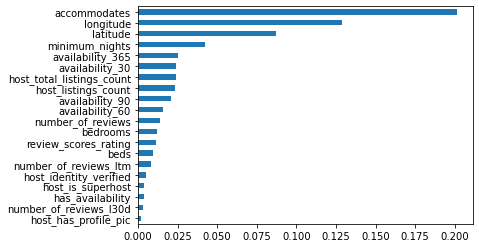

In [30]:
feat_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)[:20]
feat_importances.sort_values().plot(kind='barh')
plt.show()

### Support Vector Machines Regressor

In [28]:
svr = SVR(epsilon=5, kernel='linear')
svr.fit(X_train, y_train) 
svrpreds = svr.predict(X_test)

print("R-Square:", r2_score(y_test, svrpreds))
print('MAE:', metrics.mean_absolute_error(y_test, svrpreds))
print('MSE:', metrics.mean_squared_error(y_test, svrpreds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svrpreds)))
print('MAPE:', mean_absolute_percentage_error(y_test, svrpreds))

R-Square: 0.47316375859103377
MAE: 38.45293625579509
MSE: 3085.9721802090726
RMSE: 55.55152725361448


### K-nearest neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_x_test=scaler.transform(X_test)
scaled_x_train=scaler.transform(X_train)

rmse_val = [] #to store rmse values for different k
for K in range(1,22):  
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(scaled_x_train, y_train)  #fit the model
    pred=model.predict(scaled_x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K-1 , 'is:', error)

plt.plot(rmse_val)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],fontsize=12)
plt.show()

In [37]:
knnr = KNeighborsRegressor(n_neighbors = 7)
knnr.fit(X_train, y_train)
knnrpreds = knnr.predict(X_test)

print("R-Square:", r2_score(y_test, knnrpreds))
print('MAE:', metrics.mean_absolute_error(y_test, knnrpreds))
print('MSE:', metrics.mean_squared_error(y_test, knnrpreds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knnrpreds)))
print('MAPE:', mean_absolute_percentage_error(y_test, knnrpreds))

R-Square: 0.2943167000737801
MAE: 64.4984712986318
MSE: 11035.42646218466
RMSE: 105.0496380868809
MAPE: 55.22399853633162


Team is going to pick a random forest to predict price because: 1. better performance, 2. requires little time to optimize it (its default params are often close to be the best ones) and it is strong with outliers, irrelevant variables, continuous and discrete variables, 3. introduced randomness, avoid overfitting, 4. human readable decision-making

# Comment Analysis

In [17]:
comment_data = pd.read_csv("reviews.csv")
comment_data.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...


In [18]:
comment = comment_data['comments']

In [19]:
# Filter out comments not in English
# -*- coding: utf-8 -*-
def isEnglish(text):
    try:
        text.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return ''
    else:
        return text

# Covert comments to lower cast, remove square bracket, remove numbers and punctuation
def text_cleaning(text):
    text = str(text)
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('  ', ' ', text)
    text = re.sub('\r', ' ', text)
    text = re.sub('\n', ' ', text)
    return text


### Vocabulary Extraction And Preprocessing

In [22]:
# to balance efficiency and accuracy
# WordNetLemmatizer() can take a long time
comment = comment.apply(lambda x: text_cleaning(isEnglish(str(x))))
comment

0                                                          
1                                          great experience
2         ive stayed with my friend at the midtown castl...
3         weve been staying here for about nights enjoyi...
4         we had a wonderful stay at jennifers charming ...
                                ...                        
891959                                                     
891960    immaculate unit in a great neighborhood the ap...
891961                                                     
891962    great stay i wasnt sure what i was expecting b...
891963    amazing beach getaway private the pictures don...
Name: comments, Length: 891964, dtype: object

In [23]:
# Apply Bag-of-Words model of all comments in the document
bag = ' '.join(comment).split()

In [24]:
# Remove stopwords and words with length <=2
stop_words = set(stopwords.words('english'))
cleanbag = [w for w in bag if w not in stop_words and len(w) > 2]

In [25]:
# group by words and show frequency
table = pd.DataFrame(cleanbag, columns=['words'])
g = table.groupby('words')
freqs = g.size()
freqs = freqs.sort_values(ascending=False)

In [26]:
# select words with top frequency
topfreqs = freqs[:50]
topfreqs

words
great           406759
place           345497
stay            306073
apartment       218802
clean           210491
location        198959
host            177546
nice            157503
would           144269
room            119040
comfortable     114623
recommend       112899
subway          106794
good            105556
everything      102664
really           98701
close            96641
easy             93678
definitely       90714
perfect          85646
time             83878
well             75309
space            74865
home             73916
also             67613
neighborhood     66991
super            64604
helpful          62043
quiet            59890
amazing          59375
restaurants      57808
get              57155
manhattan        56789
area             55690
nyc              55575
walk             54413
like             53709
friendly         53215
new              52746
bed              51264
wonderful        50860
highly           50784
back             50154
brook

In [27]:
wordfrequency = pd.DataFrame(freqs, columns=['frequency'])
wordfrequency.to_csv('wordfrequency.csv', index=True)

## Host-side insights
### what words are mentioned in comments? -> What does customers care about?

The house and its enviroment condition: 'clean', 'quite', 'new', 'comfortable'

The house geography condition: 'location'，'subway', 'close', 'restaurants', 'walk'

The host: 'nice', 'helpful'
